In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys,traceback
import random
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier,StackingClassifier
from lightgbm import LGBMClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingCVClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

###################################################

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [2]:
hr_data = pd.read_csv('train.csv')

In [3]:
hr = hr_data
column_names = hr.columns.tolist()
print("Column Names : ")
print(column_names)

Column Names : 
['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department', 'salary', 'Attrition']


In [4]:
print("Sample Data : ")
hr.head()

Sample Data : 


,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1


In [5]:
#Datatype for each column
hr.dtypes

satisfaction_level        float64
last_evaluation_rating    float64
projects_worked_on          int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
promotion_last_5years       int64
Department                 object
salary                     object
Attrition                   int64
dtype: object

In [6]:
#Checking for missing values
hr.isnull().any()

satisfaction_level        False
last_evaluation_rating    False
projects_worked_on        False
average_montly_hours      False
time_spend_company        False
Work_accident             False
promotion_last_5years     False
Department                False
salary                    False
Attrition                 False
dtype: bool

In [7]:
#Dimensions of the data
hr.shape

(25491, 10)

In [8]:
#Summary for each variable
hr.describe()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
count,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000
mean,6.137704,7.167832,4.215174,205.286846,3.497156,0.146012,0.021419,0.234985
std,2.486316,1.710754,1.324228,50.182916,1.457715,0.353125,0.144780,0.423998
min,0.900000,3.600000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,4.400000,5.600000,3.000000,160.000000,3.000000,0.000000,0.000000,0.000000
50%,6.500000,7.200000,4.000000,204.000000,3.000000,0.000000,0.000000,0.000000
75%,8.200000,8.700000,5.000000,249.000000,4.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,8.000000,320.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
#Unique values for department
hr['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
#Combining technical, support and IT into one department
hr['Department'] = np.where(hr['Department'] == 'support', 'technical', hr['Department'])
hr['Department'] = np.where(hr['Department'] == 'IT', 'technical', hr['Department'])

In [11]:
#Updated unique values for department
hr['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

# Data Exploration

In [12]:
hr['Attrition'].value_counts()

0    19501
1     5990
Name: Attrition, dtype: int64

In [13]:
hr.groupby('Attrition').mean()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
Attrition,,,,,,,
0,6.668899,7.159582,4.198041,203.199836,3.378647,0.176247,0.026665
1,4.408347,7.194691,4.270952,212.081302,3.882972,0.047579,0.004341


In [14]:
hr.groupby('Department').mean()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
Department,,,,,,,,
RandD,6.186966,7.095356,4.250936,204.902622,3.361049,0.173783,0.034457,0.153558
accounting,5.835790,7.193845,4.224924,205.725684,3.530395,0.127660,0.018237,0.265957
hr,6.037272,7.072720,4.078509,203.311657,3.357653,0.122125,0.021412,0.283902
management,6.218932,7.247423,4.262418,205.244611,4.299906,0.160262,0.111528,0.134958
marketing,6.200756,7.165430,4.087973,203.987629,3.578694,0.158763,0.050172,0.229553
product_mng,6.200727,7.185535,4.223910,203.686262,3.456407,0.149934,0.000000,0.218626
sales,6.164850,7.110125,4.183995,205.039581,3.541804,0.143984,0.023519,0.240212
technical,6.137237,7.212923,4.257805,206.091864,3.410974,0.145222,0.008798,0.245317


In [15]:
hr.groupby('salary').mean()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition
salary,,,,,,,,
high,6.386124,7.049012,4.170743,203.784102,3.686736,0.153340,0.060207,0.066792
low,6.019963,7.180714,4.215674,205.429090,3.441506,0.144884,0.008385,0.291945
medium,6.222742,7.176300,4.223226,205.417351,3.523353,0.145868,0.028644,0.203156


# Data Visualization

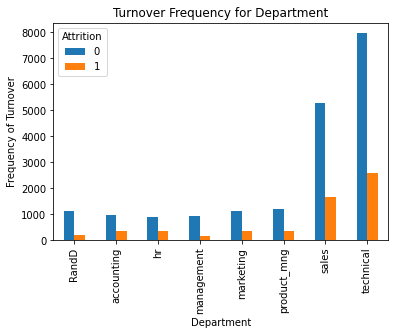

In [16]:
%matplotlib inline

#Bar chart for department employee work for and the frequency of turnover
pd.crosstab(hr['Department'],hr['Attrition']).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

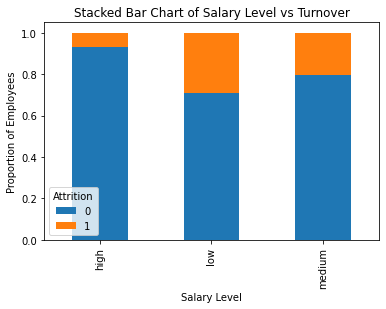

In [17]:
#Bar chart for employee salary level and the frequency of turnover
table=pd.crosstab(hr.salary, hr.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

In [18]:
#Proportion of employees left by department
pd.crosstab(hr.Department, hr.Attrition)

Attrition,0,1
Department,,
RandD,1130,205
accounting,966,350
hr,903,358
management,923,144
marketing,1121,334
product_mng,1183,331
sales,5298,1675
technical,7977,2593


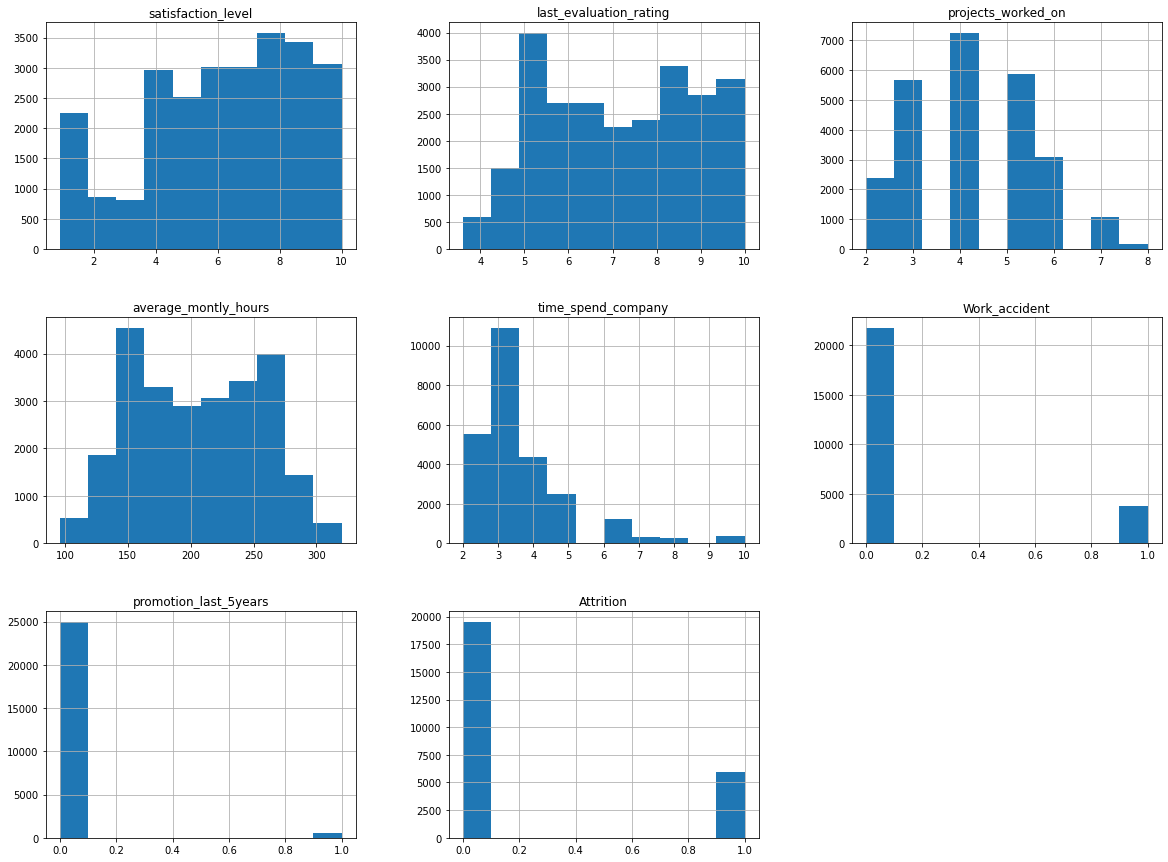

In [19]:
#Histogram of numeric variables
num_bins = 10

hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

In [20]:
hr.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1


# One-Hot Encoding

In [21]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
cat_vars=['Department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

In [22]:
#dropping main columns and 
hr.drop(hr.columns[[7, 8]], axis=1, inplace=True)

In [23]:
hr.columns.values

array(['satisfaction_level', 'last_evaluation_rating',
       'projects_worked_on', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'Attrition',
       'Department_RandD', 'Department_accounting', 'Department_hr',
       'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales',
       'Department_technical', 'salary_high', 'salary_low',
       'salary_medium'], dtype=object)

In [24]:
hr.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Attrition,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_technical,salary_high,salary_low,salary_medium
0,3.8,5.3,3,167,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,8.0,8.6,6,272,6,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1.1,8.8,8,282,4,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,3.7,5.2,3,169,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,4.1,5.0,3,163,3,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [25]:
hr_vars=hr.columns.values.tolist()
y=['Attrition']
X=[i for i in hr_vars if i not in y]

In [26]:
X

['satisfaction_level',
 'last_evaluation_rating',
 'projects_worked_on',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'Department_RandD',
 'Department_accounting',
 'Department_hr',
 'Department_management',
 'Department_marketing',
 'Department_product_mng',
 'Department_sales',
 'Department_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [27]:
hr.shape

(25491, 19)

# Feature Selection

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, step = 10)
rfe = rfe.fit(hr[X], hr[y])
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False False  True  True  True False  True  True False
 False False False  True  True False]
[1 2 1 2 2 1 1 1 2 1 1 2 2 2 2 1 1 2]


In [29]:
cols=['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'Department_RandD', 'Department_hr', 'Department_management', 'salary_high', 'salary_low','salary_medium'] 
X=hr[cols]
y=hr['Attrition']

## Logistic Regression

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
#Logistic Regression Classifier
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [32]:
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.766


In [33]:
#Classification report for Logistic Regression
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      5840
           1       0.51      0.26      0.34      1808

    accuracy                           0.77      7648
   macro avg       0.66      0.59      0.60      7648
weighted avg       0.73      0.77      0.74      7648



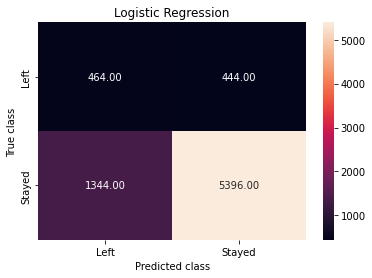

In [34]:
#Confusion Matrix for Logistic Regression
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, labels = [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

## Random Forest

In [35]:
#Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.964


In [37]:
#Classification report for Random Forest
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5840
           1       0.91      0.94      0.93      1808

    accuracy                           0.96      7648
   macro avg       0.95      0.96      0.95      7648
weighted avg       0.97      0.96      0.96      7648



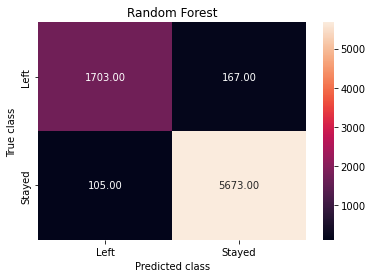

In [38]:
#Confusion Matrix for Random Forest
y_pred = rf.predict(X_test)
forest_cm = metrics.confusion_matrix(y_pred, y_test, labels = [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

## Support Vector Machine

In [39]:
#SVM Classifier
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [40]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.891


In [41]:
#Classification report for SVM
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      5840
           1       0.75      0.82      0.78      1808

    accuracy                           0.89      7648
   macro avg       0.84      0.87      0.85      7648
weighted avg       0.90      0.89      0.89      7648



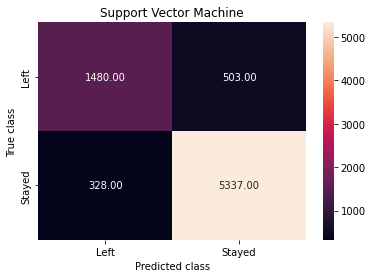

In [42]:
#Confusion Matrix for SVM
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, labels = [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

## XGBoost Classifier

In [43]:
xgb=XGBClassifier()
xgb.fit(X_train, y_train)

[23:10:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
print('XGBoost accuracy: {:.3f}'.format(accuracy_score(y_test, xgb.predict(X_test))))

XGBoost accuracy: 0.963


In [45]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5840
           1       0.91      0.93      0.92      1808

    accuracy                           0.96      7648
   macro avg       0.95      0.95      0.95      7648
weighted avg       0.96      0.96      0.96      7648



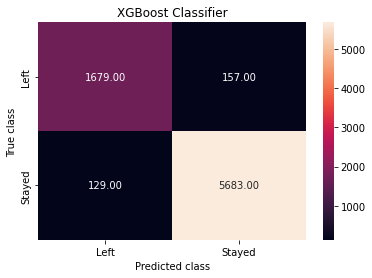

In [46]:
#Confusion Matrix for XGBoost Classifier
xgb_y_pred = xgb.predict(X_test)
xgb_cm = metrics.confusion_matrix(xgb_y_pred, y_test, labels = [1,0])
sns.heatmap(xgb_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('XGBoost Classifier')
plt.savefig('XGBoost_Classifier')

## 10 Fold Cross Validation

In [47]:
#For logistic regression
logreg_kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=logreg_kfold, scoring=scoring)
print("cross validation average accuracy for logistic regression: %.3f" % (results.mean()))

cross validation average accuracy for logistic regression: 0.774


In [48]:
#For Random Forest
rf_kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=rf_kfold, scoring=scoring)
print("cross validation average accuracy for Random Forest Classifier: %.3f" % (results.mean()))

cross validation average accuracy for Random Forest Classifier: 0.962


In [49]:
#For SVM
svm_kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
modelCV = SVC()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=svm_kfold, scoring=scoring)
print("cross validation average accuracy for SVM Classifier: %.3f" % (results.mean()))

cross validation average accuracy for SVM Classifier: 0.891


In [50]:
#For XGBoost
xg_kfold = model_selection.KFold(n_splits=10, random_state=7,shuffle=True)
modelCV = XGBClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=xg_kfold, scoring=scoring)
print("cross validation average accuracy for XGBoost Classifier: %.3f" % (results.mean()))

[23:14:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## Ensemble Method 1

In [51]:
from sklearn.ensemble import VotingClassifier
from sklearn import tree
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='soft')
model.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                             ('dt', DecisionTreeClassifier(random_state=1))],
                 voting='soft')

In [52]:
print('Ensmeble method 1 accuracy: {:.3f}'.format(accuracy_score(y_test, model.predict(X_test))))

Ensmeble method 1 accuracy: 0.953


In [53]:
#Classification report for ensemble methdo 1
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5840
           1       0.93      0.87      0.90      1808

    accuracy                           0.95      7648
   macro avg       0.94      0.92      0.93      7648
weighted avg       0.95      0.95      0.95      7648



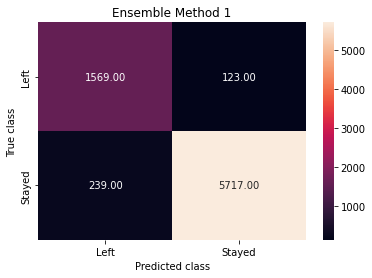

In [54]:
#Confusion Matrix for ensemble method 1
model_y_pred = model.predict(X_test)
model_cm = metrics.confusion_matrix(model_y_pred, y_test,labels = [1,0])
sns.heatmap(model_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Ensemble Method 1')
plt.savefig('ensemble method 1')

## Ensemble Method 2

In [55]:
estimators=[('xgBoost',XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5,use_label_encoder=False,eval_metric='logloss')),
            ('randomforest',RandomForestClassifier(max_depth=10)),
            ('svm',svm.SVC(kernel="rbf"))]

In [56]:
stackClassifier=StackingClassifier(estimators=estimators,cv=10,final_estimator=LogisticRegression())
stackClassifier.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('xgBoost',
                                XGBClassifier(base_score=None, booster='dart',
                                              colsample_bylevel=0.6,
                                              colsample_bynode=0.5,
                                              colsample_bytree=0.6,
                                              enable_categorical=False,
                                              eval_metric='logloss', gamma=0.6,
                                              gpu_id=None, importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.01,
                                              max_delta_step=None, max_depth=15,
                                              min_child_weight=None,...
                                              monotone_constraints=None,
                                              

In [57]:
print('ensemble method 3 accuracy: {:.3f}'.format(accuracy_score(y_test,stackClassifier.predict(X_test))))

ensemble method 3 accuracy: 0.959


In [58]:
print(classification_report(y_test,stackClassifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5840
           1       0.91      0.91      0.91      1808

    accuracy                           0.96      7648
   macro avg       0.94      0.94      0.94      7648
weighted avg       0.96      0.96      0.96      7648



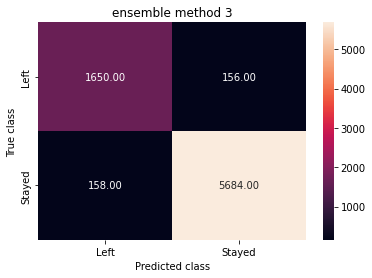

In [59]:
stackClassifier_y_pred = stackClassifier.predict(X_test)
stackClassifier_cm = metrics.confusion_matrix(stackClassifier_y_pred, y_test,labels = [1,0])
sns.heatmap(stackClassifier_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('ensemble method 3')
plt.savefig('ensemble_method_3')

### Variable Importance for Random Forest Classifier

In [60]:
feature_labels = np.array(['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low','salary_medium'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_management-0.32%
department_hr-0.38%
department_RandD-0.40%
salary_medium-0.43%
promotion_last_5years-0.47%
salary_high-0.89%
salary_low-0.95%
Work_accident-2.46%
time_spend_company-32.25%
satisfaction_level-61.45%


### Variable Importance for XGBoost Classifier

In [61]:
feature_labels = np.array(['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low','salary_medium'])
importance = xgb.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_management-1.74%
department_hr-2.11%
department_RandD-2.33%
salary_medium-2.67%
salary_low-4.23%
promotion_last_5years-5.57%
Work_accident-6.54%
salary_high-9.07%
satisfaction_level-30.38%
time_spend_company-35.35%


In [62]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(rf, f)